In [112]:
#importing the original data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df=pd.read_csv('food.tsv',sep='\t')

df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#check the size of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186558 entries, 0 to 186557
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(109), int64(2), object(52)
memory usage: 232.0+ MB


In [114]:
#choose the columns that will be uesd
ndf = df[['product_name', 'energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g','carbohydrates_100g','sugars_100g',
          'fiber_100g','proteins_100g','salt_100g','sodium_100g','vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g','nutrition-score-uk_100g']].copy()
ndf.head()

,product_name,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
2,Peanuts,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
3,Organic Salted Nut Mix,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0
4,Organic Polenta,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
#check the numbers
ndf.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
count,176538.000000,1.754540e+05,150793.000000,139685.000000,140231.000000,1.755140e+05,165387.000000,142236.000000,1.759770e+05,175871.000000,175868.000000,133650.000000,136015.000000,134800.000000,135868.000000,144555.000000
mean,1131.948708,8.930461e+04,4.950146,0.072408,0.019550,8.929515e+04,16.999411,2.900304,8.903369e+04,2.396194,0.943398,0.000356,0.022362,0.120788,0.003276,9.421929
std,839.207458,3.740201e+07,7.552730,1.551420,0.308719,3.739562e+07,21.877833,4.772905,3.734639e+07,154.562518,60.851903,0.073038,2.258618,3.370308,0.205224,9.035625
min,0.000000,0.000000e+00,0.000000,-3.570000,0.000000,0.000000e+00,-17.860000,-6.700000,-8.000000e+02,0.000000,0.000000,-0.000340,-0.002100,0.000000,0.000000,-13.000000
25%,368.000000,0.000000e+00,0.000000,0.000000,0.000000,6.670000e+00,1.630000,0.000000,0.000000e+00,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1142.000000,4.420000e+00,1.790000,0.000000,0.000000,2.316000e+01,6.670000,1.500000,4.110000e+00,0.614680,0.242000,0.000000,0.000000,0.035000,0.001000,10.000000
75%,1674.000000,2.000000e+01,7.140000,0.000000,0.021000,6.012250e+01,25.810000,3.600000,1.000000e+01,1.450340,0.571000,0.000107,0.003200,0.100000,0.002400,17.000000
max,94140.000000,1.566667e+10,175.380000,369.000000,95.238000,1.566667e+10,166.670000,400.000000,1.566667e+10,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000


In [116]:
#clean the attributes with missing values
ndf.dropna(inplace=True)
ndf.describe()

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-uk_100g
count,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000,123515.000000
mean,1215.973757,13.432949,4.726833,0.068388,0.018400,35.604977,15.417843,2.864907,7.964559,1.397898,0.550353,0.000131,0.006084,0.093813,0.002426,9.416071
std,746.808165,15.489337,6.848782,1.573615,0.325863,28.172074,19.527139,4.399341,8.179303,14.055583,5.533693,0.000536,0.107720,0.845516,0.151163,9.045065
min,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,0.000000,-3.570000,0.000000,0.000000,0.000000,-0.002100,0.000000,0.000000,-10.000000
25%,494.000000,0.830000,0.000000,0.000000,0.000000,9.180000,1.670000,0.000000,2.350000,0.147320,0.058000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1272.000000,7.840000,1.790000,0.000000,0.000000,28.570000,5.880000,1.600000,5.650000,0.746760,0.294000,0.000000,0.000000,0.035000,0.000970,10.000000
75%,1766.000000,21.430000,7.140000,0.000000,0.019000,60.710000,24.420000,3.600000,10.840000,1.450340,0.571000,0.000100,0.002100,0.100000,0.002400,17.000000
max,14644.000000,100.000000,100.000000,369.000000,95.238000,136.000000,134.000000,100.000000,100.000000,3048.000000,1200.000000,0.051818,35.714300,285.714000,50.000000,40.000000


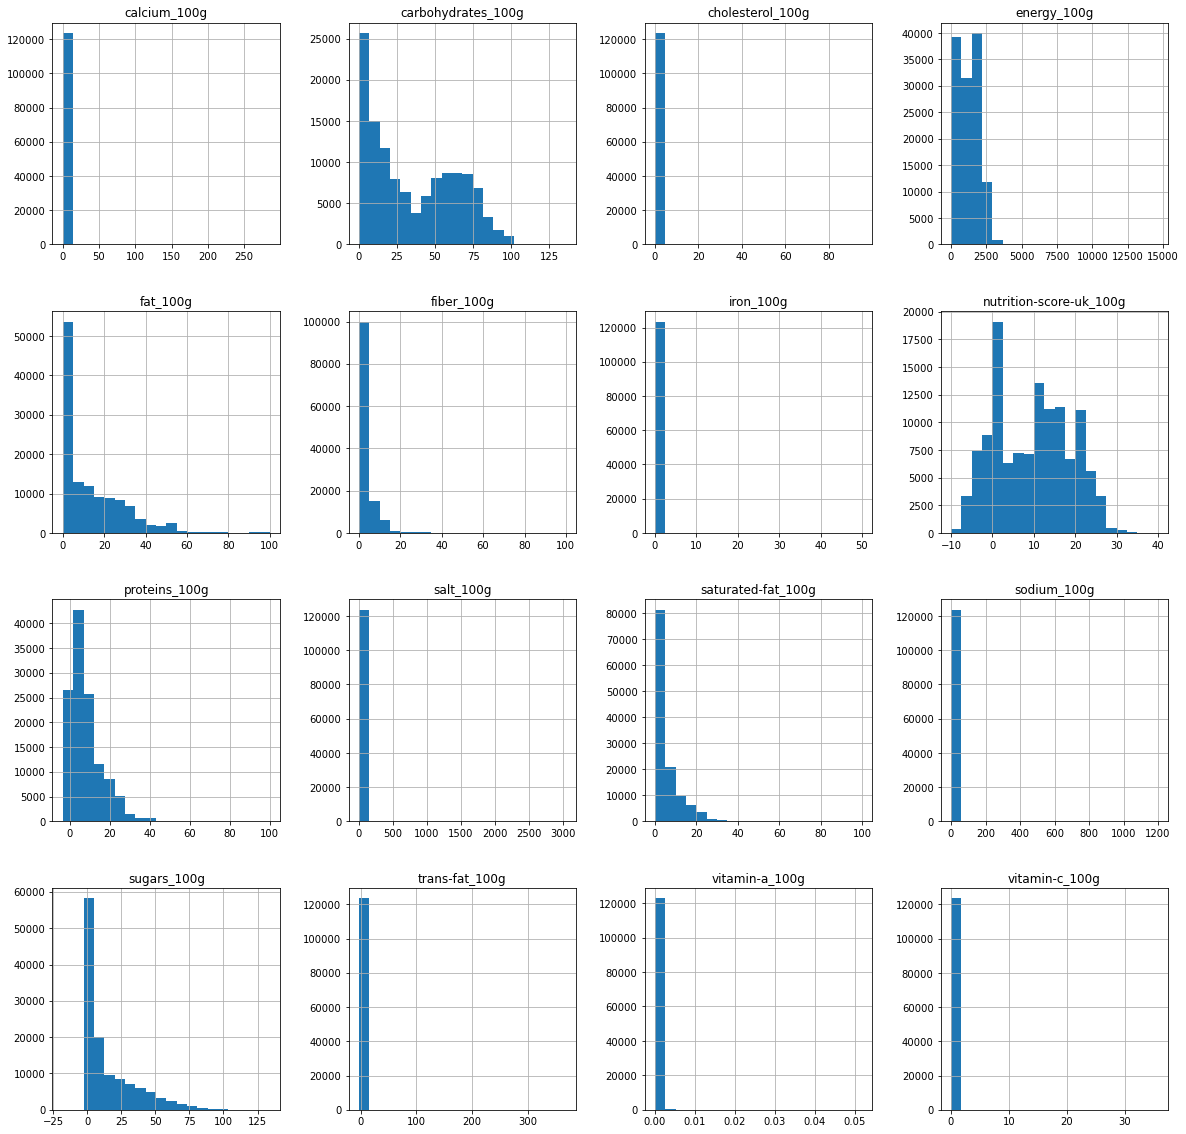

In [7]:
#visualize the distribution of each column, to see the distribution of the values
ndf.iloc[:, :50].hist(bins=20, figsize=(20,20))
plt.show()

In [119]:
#health diet refers to low cholesterol, fat, sugars, salt sodium, so delete the attributes above 75% of each values;
#meanwhile try to maintain a high level of fiber, proteins, calcium and iron, so delete the attributes lower than 25% of those values
hdf = ndf.drop(ndf[(ndf.cholesterol_100g > 0.019) | (ndf.fat_100g > 21.43) | (ndf.carbohydrates_100g > 60.71) | 
                   (ndf.sugars_100g > 24.42) | (ndf.salt_100g > 1.45) | (ndf.sodium_100g > 0.57) | (ndf.fiber_100g < 1.6) | 
                   (ndf.proteins_100g < 2.35) | (ndf.calcium_100g < 0.035) | (ndf.iron_100g < 0.00097)].index)
hdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5628 entries, 2 to 176964
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             5628 non-null   object 
 1   energy_100g              5628 non-null   float64
 2   fat_100g                 5628 non-null   float64
 3   saturated-fat_100g       5628 non-null   float64
 4   trans-fat_100g           5628 non-null   float64
 5   cholesterol_100g         5628 non-null   float64
 6   carbohydrates_100g       5628 non-null   float64
 7   sugars_100g              5628 non-null   float64
 8   fiber_100g               5628 non-null   float64
 9   proteins_100g            5628 non-null   float64
 10  salt_100g                5628 non-null   float64
 11  sodium_100g              5628 non-null   float64
 12  vitamin-a_100g           5628 non-null   float64
 13  vitamin-c_100g           5628 non-null   float64
 14  calcium_100g          

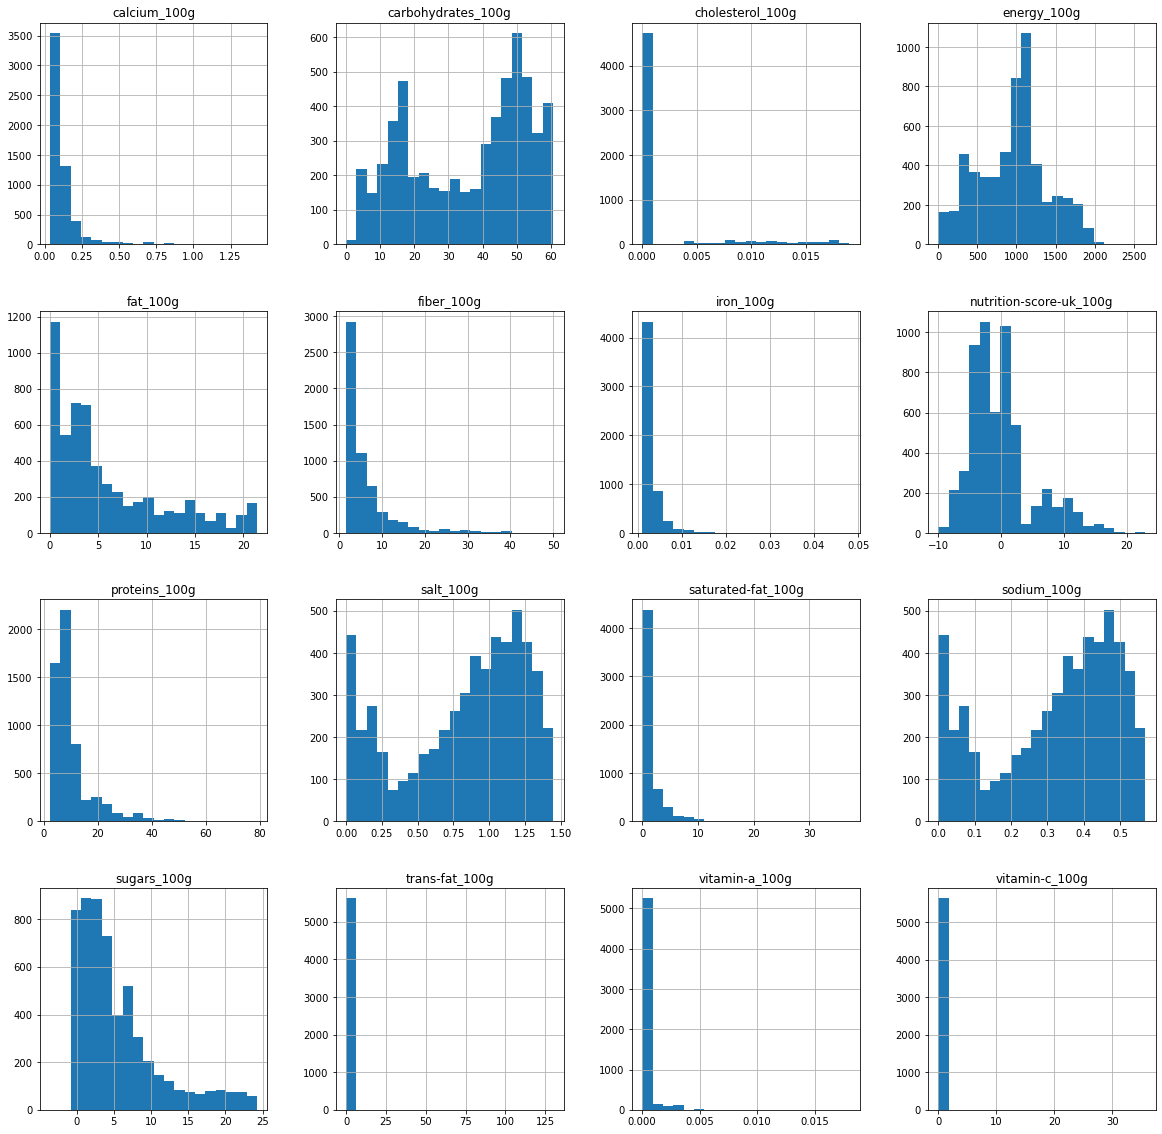

In [123]:
#visualized view of the updated dataframe
hdf.iloc[:, :50].hist(bins=20, figsize=(20,20))
plt.show()

In [124]:
#install surprise for the rec system
! pip install scikit-surprise

In [150]:
from surprise import KNNBasic
from surprise import Dataset
from surprise import dump
from surprise import NormalPredictor
from surprise import Reader
from surprise import accuracy
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import PredefinedKFold
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV
from surprise.accuracy import rmse

reader = Reader()
data = Dataset.load_from_df(hdf[['product_name', 'proteins_100g','nutrition-score-uk_100g']], reader)
cross_validate(NormalPredictor(), data, cv=3)
all_trainset = data.build_full_trainset()
algo = KNNBasic(k=40,min_k=3,sim_options={'user_based': True}) 
algo.fit(all_trainset)
def getSimilarUsers(top_k,u_id):
    user_inner_id = algo.trainset.to_inner_uid(u_id)
    user_neighbors = algo.get_neighbors(user_inner_id, k=top_k)
    user_neighbors = (algo.trainset.to_raw_uid(inner_id) for inner_id in user_neighbors)
    return user_neighbors

Computing the msd similarity matrix...
Done computing similarity matrix.


In [164]:
list(getSimilarUsers(20, 'Peanuts'))

['Japanese Style Peanuts',
 'Pulse, Roasted Chickpeas, Original',
 'Pulse, Roasted Chickpeas, Sea Salt & Garlic',
 'Pulse, Organic Roasted Chickpeas, Spicy Lemon Zest',
 'Pulse, Roasted Chickpeas',
 'Birchberry Bistro, Roasted Garlic And Tomato Hummus',
 'Birchberry Bistro, Hummus, Red Bell Pepper',
 'Inner Bean Snack',
 'Flavored Green Pea Crisps, Baked',
 'Lentil Bean',
 'Harvest Snaps, Flavored Lentil Bean Crisps, Baked, Onion Thyme',
 'Harvest Snaps, Flavored Lentil Bean Crisp Baked, Tomato Basil',
 'Birchberry Bistro, Traditional Hummus',
 'Baked Green Pea Crisps Snack',
 'Calbee, Harvest Snaps, Green Pea Crisps, Caesar',
 'Calbee, Harvest Snaps, Flavored Green Pea Crisps, Wasabi Ranch',
 'Holy Crap, Dragons Blend Breakfast Cereal',
 'Contemplates Inner Peas',
 'Sprouted 7-Grain Bread',
 "Joseph's, Flax Oat Bran & Whole Wheat Mini Pita Bread With Ala Omega-3"]